# Ecology Exercise 2

## Part 1: Predator Prey Advanced

Last time, we had defined a set of equations that together would predict how a population of squirrels (prey) and pine martens (predators) would interact in a forest. <br>
This time, we are going to continue developing a more accurate model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Our model from Exercise 1, presented below, looks more realistic, but there's one problem: Try running the simulation with no initial predators and see what happens. <br>
 <br>
When predators are present, prey numbers are around 140 after 20 days. But with no predators, prey have unrealistically high numbers (more than 250000 squirrels!) This is because our model doesn't take into acount the carrying capacity. <br>
<br>







![Beiden](https://github.com/EamonOKeeffe/images/blob/master/beiden1.png?raw=true)

We can make a small tweak to our model to ensure that the prey won't reach absurdly high numbers in the absence of predators:<br> 
<br>

$$y_{n+1} = y_{n}+((a y_{n} - {\color{red} {r_yy_{n}^2}})- b x_{n} y_{n})dt $$<br>
$$x_{n+1} = x_{n}+(-x_{n} + y_{n} x_{n})dt $$ 
<br>
These are the same as before, but here, $r_y$ is a constant that will reduce the growth of prey populations. Since it is multiplied by $y^2$, the effect of $r_y$ becomes greater the higher $y$ is. 
Modify your equation to fit the adjusted model, and set $r = 0.04$. 

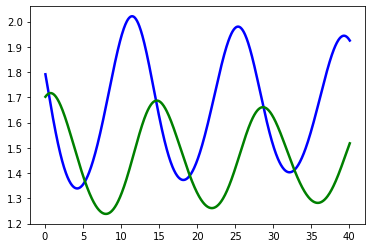

In [2]:
a = 0.6 # prey birth
b = 0.4 # prey death
c = 0.35 # pred birth
d = 0.21 # pred death 

max_time = 40
dt = 0.05

t = 0
y = 1.8 
x = 1.7 

ry = 0.01  # new coefficient 

tL = []  
preyL = []
predL = []

while t <= max_time:

    t = t + dt
 #   y = y + (a*y - b*y*x)*dt             # old model
    y = y + ((a*y-(ry*(y**2))) - b*y*x)*dt  # new model 
    x = x + (-c*x + d*y*x)*dt


    tL.append(t)
    preyL.append(y)
    predL.append(x)

   
plt.plot(tL, preyL, 'b', tL, predL, 'g', lw = 2.5, linestyle='solid', )
plt.show()

Your graph may look similar, but if you set your predators now to 0, you will see a much more realistic prey growth curve.<br>
<br>
Congratulations! You have now incorperated simple predator prey model with carrying capacity. But what if we add another species? <br>

We must introduce some extra variables:
<br>
* e = 0.1, how much the pine marten kills red squirrels
* f = 0.5, how much the pine marten kills grey squirrels
* g = 0.008, death rate of pine martens
* h = 0.001, birth rate of pine martens 
<br>
<br>
Next, we can rename r to ry so that we know it is relevant to prey, and create a new constant: $r_z$, which does exactly the same thing, but will keep out new pine marten population under control if they are in favourable conditions (lots of tasty squirrels) 


## Part 2: Predator/Predator/Prey

Now let's introduce a 3-species model. In our forest we have:
1. red squirrels, 
2. grey squirrels (a predator to red squirrels)
3. pine martens (a predator to both, but primarily grey squirrels), which will be denoted by $z$

$$y_{n+1} = y_{n}+(a y_{n}-r_yy_{n}^2 - b y_{n} x_{n}-{\color{red} {ey_{n}z_{n}}})  dt $$ <br>
$$x_{n+1} = x_{n}+(-c x_{n} + d x_{n} y_{n} - {\color{red} {fz_{n}x_{n}}})  dt $$  <br>
$${\color{red} {z_{n+1} = z_{n}+(hz_{n} -r_zz_{n}^2 + z_{n}(z_{1x}x_{n})+z_{n}(z_{1y}y_{n})-gz_{n})  dt}} $$ 

* z = pine marten population at the nth time interval
* $r_z$ = population control constant to keep populations from exceeding the carrying capacity (just like $r_y$ does with prey)
* e = the negative effect that pine martens have on red squirrels (the prey)
* f = the negative effect that pine martens have on grey squirrels (the predators)
* g = the natural death rate of the pine martens. 
* h = Pine marten birth rate

<br>
Set z = 0.4 and see what happens. 


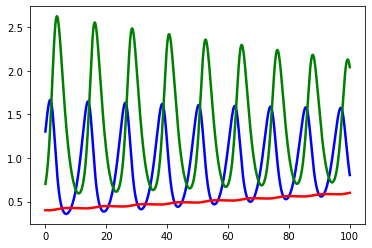

In [3]:
a = 0.6 # y birth
b = 0.4 # y death
c = 0.3 # x death
d = 0.6 # x birth 0.2

e = 0.11 # prey spred victim 
f = 0.5 # pred spred victim 
g = 0.01 # z death
h = 0.0001 # z birth 0.0001


max_time = 100
dt = 0.01
t = 0

y = 1.3
x = 0.7
z = 0.4

y1 = 1.0
x1 = 1.0
z1x = 0.01 # spred pred repro
z1y = 0.001 # spred prey repro

ry = 0.01  # new coefficient 
rz = 0.001

tL = []  
preyL = []
predL = []
spredL = []

while t <= max_time:

    t = t + dt
         
    y = y + ((a*y-(ry*y**2)) - (b*y*x)- (e*y*z))*dt  
    x = x + (-c*x + d*x*y - f*z*x)*dt
    z = z + ((h*z-(rz*z**2))+ (z*z1x*x) + (z*z1y*y) - (g*z))*dt
   
    tL.append(t)
    preyL.append(y)
    predL.append(x)
    spredL.append(z)


plt.plot(tL, preyL, 'b', tL, predL, 'g', tL, spredL, 'r', lw = 2.5, linestyle='solid', )
plt.show()

The effect of the pine marten population may not appear to be very dramatic across 40 days, but perhaps over a longer timescale we will notice some consequences of introducing them. <br> <br> Set your plot to track these interactions over the course of a year. 

In a recent study, it was proposed that the introduction of pine martens to rural areas of Ireland could have a significant positive effect on the populations of the endangered red squirrel due to the pine marten's tendency to hunt grey squirrels at a higher rate. <br>
Based off the model you have created and its plot over a year, do you agree with the study's proposal?

In [4]:
#answer

## Part 3: Plotting a vortex graph

Let's try plotting predator/prey relationships in a slightly different way. 
For simplicity, we will go back to the basic model we had at the end of Excercise 1: 

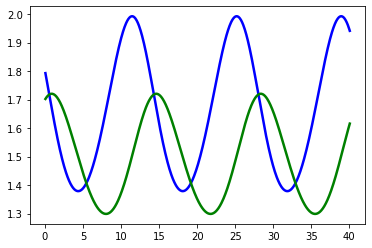

In [66]:
a = 0.6 
b = 0.4
c = 0.35
d = 0.21

max_time = 40
dt = 0.05

t = 0
y = 1.8 # initial prey 
x = 1.7 # init pred

tL = []  # refedine empty lists so that previous cell is wiped
preyL = []
predL = []

while t <= max_time:

    t = t + dt
    
    y = y + (a*y - b*y*x)*dt  
    x = x + (-c*x + d*y*x)*dt


    tL.append(t)
    preyL.append(y)
    predL.append(x)


plt.plot(tL, preyL, 'b', tL, predL, 'g', lw = 2.5, linestyle='solid', )
plt.show()

Here, the constantly updated list of prey and predator values is plotted vs time. But what if we plotted prey against predators? Can you think of what shape that graph would make?

Plot prey vs predators below.
#hint, it is the appended list of values you are plotting, not the x-value itself (otherwise you would just have one data point!)

Text(0.5, 0, 'Pine Marten (predator)')

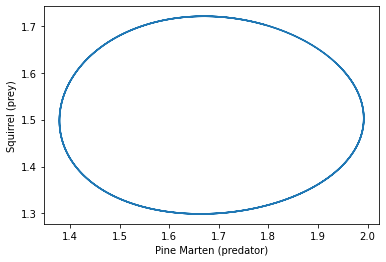

In [80]:
plt.plot(preyL, predL)
plt.ylabel("Squirrel (prey)")
plt.xlabel("Pine Marten (predator)")

From the graph above answer the following: <br>

* When predator populations are at their highest, what is the approximate prey population? 

* When prey prey populations are at their lowest, what is the approximate predator population? 


Now make a similar plot but with the model from ealier that incorporates the carrying capacity. 
 

Text(0.5, 0, 'Pine Marten (predator)')

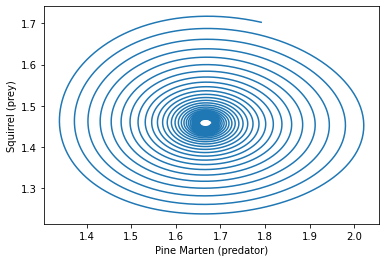

In [43]:
a = 0.6 # prey birth
b = 0.4 # prey death
c = 0.35 # pred birth
d = 0.21 # pred death 

max_time = 400
dt = 0.05

t = 0
y = 1.8 
x = 1.7 

ry = 0.01 

tL = []  
preyL = []
predL = []

while t <= max_time:

    t = t + dt
    y = y + ((a*y-(ry*(y**2))) - b*y*x)*dt  # new model 
    x = x + (-c*x + d*y*x)*dt


    tL.append(t)
    preyL.append(y)
    predL.append(x)


plt.plot(preyL, predL)
plt.ylabel("Squirrel (prey)")
plt.xlabel("Pine Marten (predator)")

The plot appears to be converging on a specific point. What do you think is the significance of this point in relation to the populations of the predators and prey?